In [1]:
import pandas as pd
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.preprocessing import StandardScaler
 
x=df.iloc[:,0:4].values
y=df['species'].values

x=StandardScaler().fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [3]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1', 'principal component 2', 'principal component 3'])

In [4]:
finalDf=pd.concat([principalDf,df[['species']]],axis=1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,species
0,-2.264542,0.505704,-0.121943,setosa
1,-2.086426,-0.655405,-0.227251,setosa
2,-2.367950,-0.318477,0.051480,setosa
3,-2.304197,-0.575368,0.098860,setosa
4,-2.388777,0.674767,0.021428,setosa


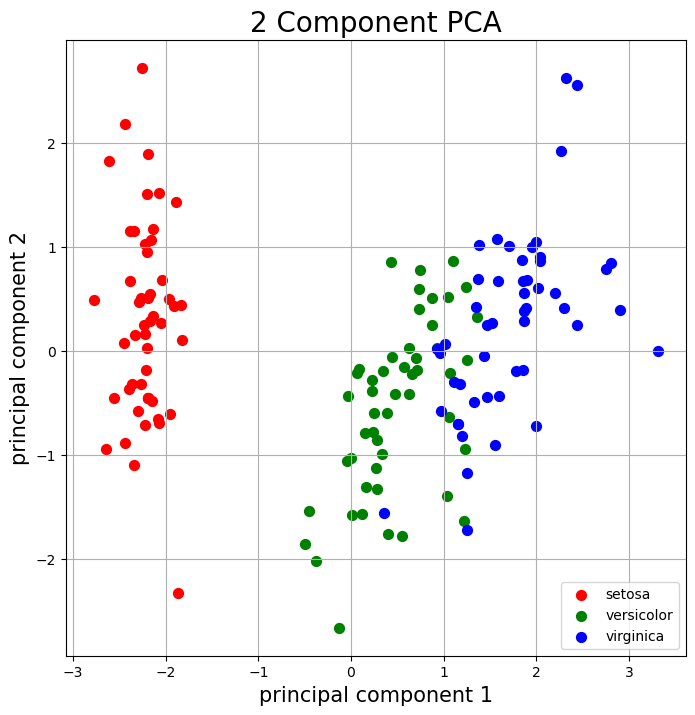

In [5]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1',fontsize=15)
ax.set_ylabel('principal component 2',fontsize=15)
ax.set_title('2 Component PCA',fontsize=20)
targets=['setosa', 'versicolor', 'virginica']
colors=['r','g','b']
for target,color in zip(targets,colors):
    ind=finalDf['species']==target
    ax.scatter(finalDf.loc[ind,'principal component 1']
               ,finalDf.loc[ind,'principal component 2']
               ,c=color
               ,s=50
              )
ax.legend(targets)
ax.grid()

In [6]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

In [ ]:
# enddddddddddddddddd

In [7]:
from sklearn.linear_model import Perceptron
model=Perceptron(max_iter=1000,random_state=43,tol=1e-3)
model.fit(x_train,y_train.ravel())
pred=model.predict(x_test)
print(pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa']


In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

1.0


In [9]:
x1=finalDf.drop(['species'],axis=1)
x1=StandardScaler().fit_transform(x1)
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=42)

In [10]:
model=Perceptron(max_iter=1000,random_state=43,tol=1e-3)
model.fit(x1_train,y_train.ravel())
pred=model.predict(x1_test)
print(pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'virginica'
 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa']


In [11]:
accuracy_score(y_test,pred)

0.9111111111111111